<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/Effective_Python/blob/master/intro_to_importing_data_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**We'd learn how to import data from a large variety of import data sources. For example:-<br>1. Flat files i.e .txt, .csv<br>2. Files native to other software such as .xls, Stata, SAS and Matlab files<br>3. Relational Databases such as Sqlite, Postgresql.<br>
All these and some will be covered.**

First we start with basic text files, which are of two types:- The plain text such as a novel script and those containing records such as titanic.csv in which each row is a unique observation, and each column is a characteristic or feature such as titanic-passenger-class or sex or cabin.

# Chapter One: Introduction and Flat Files.

### Reading a Text file:

In [6]:
# Let's upload the moby_dick.txt file into colab.

from google.colab import files
uploaded = files.upload()

Saving moby_dick.txt to moby_dick.txt


Let's inspect the first 5 lines of the txt file

In [7]:
! head -5 'moby_dick.txt'

CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of


In [8]:
file_link = 'moby_dick.txt'
with open(file_link, 'r') as new_file:
    read_file = new_file.read()
print(read_file)

CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If th

Let'see the files in our current working directory

In [9]:
! ls 

moby_dick.txt  sales.sas7bdat  sample_data


### Importing text files line by line

For large files, we may not want to print all of their content to the shell: you may wish to print only the first few lines. Enter the readline() method, which allows you to do this. When a file called file is open, you can print out the first line by executing file.readline(). If you execute the same command again, the second line will print, and so on.

In [0]:
# Read & print the first 3 lines of moby_dict.txt
with open('moby_dick.txt', 'r') as files:
    for i in range(3):
        print(files.readline())

CHAPTER 1. Loomings.



Call me Ishmael. Some years ago--never mind how long precisely--having



### The importance of flat files in data science

After working with plain text files like moby_dick.txt, now we would look at flat files such as titanic.csv in which each row is a unique passenger on board and each column a feature or characteristic of each passenger such as age, gender, e.t.c.

**Flat Files:** <br>Are basic text files containing records, that is table data without structured relationships. Flatfiles consist of records<br>This is in contrast to a relational database for example in which columns of distinct tables can be related. Note that a flatfile can have a header, which is usually the first row and describes the contents of the data columns.

The reason that flat files are so important in Data Science is that Data Scientists really like to think in records or rows of attributes. Values in flat files may be separated by a tab or a comma or any other character. These separating characters are called a **delimiter**.

### How do we import Flat files?

If they consist entirely of numbers and we want to store them in a numpy array, we could very well use numpy. If instead we want to store the data in a dataframe, we can use pandas.

**Why we like flat files and the Zen of Python...**<br>
In PythonLand, there are currently hundreds of Python Enhancement Proposals, commonly referred to as PEPs. PEP8, for example, is a standard style guide for Python, written by our sensei Guido van Rossum himself. It is the basis for how we here at DataCamp ask our instructors to style their code. Another one of my favorites is PEP20, commonly called the Zen of Python. Its abstract is as follows:

Import the zen of python below.

In [10]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### Importing Flat files using Numpy

If all data in the given flatfile are numerical, we could use the package numpy. <br>First: numpy arrays are the python standard for storing numerical data. they are efficient, fast and clean.<br>Second: numpy arrays are often essential for other packages such as scikit learn, a popular python ML library. Enter the numpy functions **loadtxt()** and **genfromtxt()**

With numpy we can import pure numeric data or the numeric columns from a mixed data set by passing some attributes to the import statement
```
import numpy as np
file_name  = 'MNIST.txt'
data = np.loadtxt(file_name, delimiter=',', skiprows=1, usecols=[0,2])
```
The above codes imports the MNIST.txt data set as file_name, then it skips row 1, which is the string column-header row, since all we want is numeric data. Then we also specify that we import only the first and third columns. 
<br>
```
file_name  = 'MNIST.txt'
data = np.loadtxt(file_name, delimiter=',', skiprows=1, usecols=[0,2], dtype=str)
```
Adding the dtype paarmeter gives us the ability to specify the output type of the data we are importing.<br>
Lets see this in practice

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


So to import this data in numpy, let's do so without the column header row and just the:- survived, Pclass and Fare cols

In [0]:
# First let's save the data frame as a CSV file
titanic_df.to_csv('titanic.csv', index=False)

In [0]:
titanic_arr = np.loadtxt('titanic.csv', delimiter = ',', skiprows=1, usecols=[0,1,4])  # Note that usecols param takes only integer values

In [15]:
titanic_arr

array([[0., 3., 1.],
       [1., 1., 1.],
       [1., 3., 0.],
       ...,
       [0., 3., 1.],
       [1., 1., 0.],
       [0., 3., 0.]])

In [16]:
titanic_arr.dtype

dtype('float64')

The above loads the titanic data set without the column header and with only the specified column index

_**Note that although numpy can handle data of mixed types, it's not best practice to do so. Put mixed data types in a pandas data frame instead.**_

## Working with mixed datatypes (1)
Much of the time you will need to import datasets which have different datatypes in different columns; one column may contain strings and another floats, for example. The function np.loadtxt() will freak at this. There is another function, np.genfromtxt(), which can handle such structures. If we pass dtype=None to it, it will figure out what types each column should be

In [0]:
try:
    data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None, encoding='utf8')
except Exception as e:
    print(type(e))

Here, the first argument is the filename, the second specifies the delimiter , and the third argument names tells us there is a header. Because the data are of different types, data is an object called a structured array. Because numpy arrays have to contain elements that are all the same type, the structured array solves this by being a 1D array, where each element of the array is a row of the flat file imported. You can test this by checking out the array's shape in the shell by executing np.shape(data).

In [18]:
np.shape(data)

(891,)

In [19]:
# Let's see the elements of the first row of data
data[0]

(0, 3, 'male', 22., 1, 0, 7.25, 'S', 'Third', 'man', True, '', 'Southampton', 'no', False)

In [20]:
# Let's see the elements of the first 5 rows of data
data[:5]

array([(0, 3, 'male', 22., 1, 0,  7.25  , 'S', 'Third', 'man',  True, '', 'Southampton', 'no', False),
       (1, 1, 'female', 38., 1, 0, 71.2833, 'C', 'First', 'woman', False, 'C', 'Cherbourg', 'yes', False),
       (1, 3, 'female', 26., 0, 0,  7.925 , 'S', 'Third', 'woman', False, '', 'Southampton', 'yes',  True),
       (1, 1, 'female', 35., 1, 0, 53.1   , 'S', 'First', 'woman', False, 'C', 'Southampton', 'yes', False),
       (0, 3, 'male', 35., 0, 0,  8.05  , 'S', 'Third', 'man',  True, '', 'Southampton', 'no',  True)],
      dtype=[('survived', '<i8'), ('pclass', '<i8'), ('sex', '<U6'), ('age', '<f8'), ('sibsp', '<i8'), ('parch', '<i8'), ('fare', '<f8'), ('embarked', '<U1'), ('class', '<U6'), ('who', '<U5'), ('adult_male', '?'), ('deck', '<U1'), ('embark_town', '<U11'), ('alive', '<U3'), ('alone', '?')])

In [21]:
# Let's see the first 0 elements in the fare column of data
data['fare'][:50]

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
         8.05  ,  31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,
        18.    ,   7.225 ,  26.    ,  13.    ,   8.0292,  35.5   ,
        21.075 ,  31.3875,   7.225 , 263.    ,   7.8792,   7.8958,
        27.7208, 146.5208,   7.75  ,  10.5   ,  82.1708,  52.    ,
         7.2292,   8.05  ,  18.    ,  11.2417,   9.475 ,  21.    ,
         7.8958,  41.5792,   7.8792,   8.05  ,  15.5   ,   7.75  ,
        21.6792,  17.8   ])

## Working with mixed datatypes (2)
You have just used np.genfromtxt() to import data containing mixed datatypes. There is also another function np.recfromcsv() that behaves similarly to np.genfromtxt(), except that its default dtype is None. In this exercise, you'll practice using this to achieve the same result.

Import titanic.csv using the function np.recfromcsv() and assign it to the variable, d. You'll only need to pass file to it because it has the defaults delimiter=',' and names=True in addition to dtype=None!

In [22]:
# function np.recfromcsv() has the defaults delimiter=',' and names=True in addition to dtype=None!
# So we only pass it the file to read.
d = np.recfromcsv('titanic.csv')

/usr/local/lib/python3.6/dist-packages/numpy/lib/npyio.py:2372: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [23]:
d['fare'][:50]

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
         8.05  ,  31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,
        18.    ,   7.225 ,  26.    ,  13.    ,   8.0292,  35.5   ,
        21.075 ,  31.3875,   7.225 , 263.    ,   7.8792,   7.8958,
        27.7208, 146.5208,   7.75  ,  10.5   ,  82.1708,  52.    ,
         7.2292,   8.05  ,  18.    ,  11.2417,   9.475 ,  21.    ,
         7.8958,  41.5792,   7.8792,   8.05  ,  15.5   ,   7.75  ,
        21.6792,  17.8   ])

## Using pandas to import flat files as DataFrames (1)
In the last exercise, you were able to import flat files containing columns with different datatypes as numpy arrays. However, the DataFrame object in pandas is a more appropriate structure in which to store such data and, thankfully, we can easily import files of mixed data types as DataFrames using the pandas functions read_csv() and read_table().

In [24]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Using pandas to import flat files as DataFrames (2)
In the last exercise, you were able to import flat files into a pandas DataFrame. As a bonus, it is then straightforward to retrieve the corresponding numpy array using the attribute values. You'll now have a chance to do this using the MNIST dataset, which is available as digits.csv.

In [26]:
! wget 'https://assets.datacamp.com/production/repositories/487/datasets/d6d1b84ef06151ff913b4173e2eca8e6d5fa959b/mnist_kaggle_some_rows.csv'

--2020-06-01 15:30:40--  https://assets.datacamp.com/production/repositories/487/datasets/d6d1b84ef06151ff913b4173e2eca8e6d5fa959b/mnist_kaggle_some_rows.csv
Resolving assets.datacamp.com (assets.datacamp.com)... 13.227.47.27, 13.227.47.49, 13.227.47.96, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|13.227.47.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338477 (331K)
Saving to: ‘mnist_kaggle_some_rows.csv’

mnist_kaggle_some_r 100%[===================>] 330.54K  --.-KB/s    in 0.07s   

2020-06-01 15:30:40 (4.54 MB/s) - ‘mnist_kaggle_some_rows.csv’ saved [338477/338477]



Import the first 5 rows of the file into a DataFrame using the function pd.read_csv() and assign the result to data. You'll need to use the arguments nrows and header (there is no header in this file).

In [27]:
data = pd.read_csv('mnist_kaggle_some_rows.csv', header=None, nrows=5)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Now convert data to a numpy array
data_array = data.values
type(data_array)

numpy.ndarray

### Customizing your pandas import
The pandas package is also great at dealing with many of the issues you will encounter when importing data as a data scientist, such as comments occurring in flat files, empty lines and missing values. Note that missing values are also commonly referred to as NA or NaN. To wrap up this chapter, you're now going to import a slightly corrupted copy of the Titanic dataset titanic_corrupt.txt, which:-
<br>

contains comments after the character '#'<br>
is tab-delimited.

```
# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')
```


# Chapter Two: Importing data from other file types


## Introduction to Other File Types:

This chapter involves learning how to import:
1. Excel flies
2. MATLAB files
3. SAS files
4. Stata files
5. HDF5 files... _these are becoming a more prevalent way to store large data sets. LIGO researchers used it to store their data._
6. Pickled files... _this is a file type native to python. the concept of pickling a file is motivated by the fact that while it may be easy to save a numpy array or a pandas dataframe to a flat flie, there are many other data types such as dictionaries and lists, which isn't so obvious how to store them... Pickle to the rescue!_
<br>If we want files to be human-readable it makes sense to save them in a clever manner. **JSON** files are appropriate for python dictionaries.
<br>_Pickled files are serialized. This means they're converted into a sequence of bytes or bytestream._ 
<br>We'd learn how to import Pickled files too.

### Importing excel Sheets

```
import pandas as pd
file = 'urbanpop.xlsx'
data = pd.ExcelFile(file)
print(data.sheet_names)
```
The data.sheet_names gives us the names of the sheets in the Excel file. for eaxmple,
```
['1960-1966', '1967-1974', '1975-2011']
```
If we want to load any of the above sheets as a pandas data frame, all we need do is either use the sheet name or its'index:
```
df1 = data.parse('1967-1974') # pass the sheet name as a string
df2 = data.parse(0) # Here we pass the index of the sheet name as an Int.
```
Pandas is clever enough to know if you're telling it the sheet name or the index. 
<br> We'd also learn how to<br>
A. Customize import statetments<br>
B. Skip rows<br>
C. Import certain columns<br>
D. Change column names... _and more_

### Not so Flat anymore 
In Chapter 1, you learned how to use the IPython magic command ! ls to explore your current working directory. You can also do this natively in Python using the library os, which consists of miscellaneous operating system interfaces.

The first line of the following code imports the library os, the second line stores the name of the current directory in a string called wd and the third outputs the contents of the directory in a list to the shell.

In [0]:
# lets import the OS module
import os

In [30]:
# lets save the name of the current working directory to a variable
wd = os.getcwd()
print(wd)

# Finally let's list the files in the current working directory
os.listdir(wd)

/content


['.config',
 'sales.sas7bdat',
 'mnist_kaggle_some_rows.csv',
 'moby_dick.txt',
 'titanic.csv',
 'sample_data']

### Loading a pickled file
There are a number of datatypes that cannot be saved easily to flat files, such as lists and dictionaries. If you want your files to be human readable, you may want to save them as text files in a clever manner. JSONs, which you will see in a later chapter, are appropriate for Python dictionaries.

However, if you merely want to be able to import them into Python, you can serialize them. All this means is converting the object into a sequence of bytes, or a bytestream.

In this exercise, you'll import the pickle package, open a previously pickled data structure from a file and load it.

```
# Import pickle package
import pickle

# Open pickle file and load data: d
with open('data.pkl', 'rb') as file:
    d = pickle.load(file)

# Print d
print(d)

# Print datatype of d
print(type(d))
```


### Listing sheets in Excel files
Whether you like it or not, any working data scientist will need to deal with Excel spreadsheets at some point in time. You won't always want to do so in Excel, however!

Here, you'll learn how to use pandas to import Excel spreadsheets and how to list the names of the sheets in any loaded .xlsx file.

Recall from the video that, given an Excel file imported into a variable `spreadsheet`, you can retrieve a list of the sheet names using the attribute `spreadsheet.sheet_names`. This data contains age-adjusted mortality rates due to war in various countries over several years.

In [0]:
battle_link = 'https://assets.datacamp.com/production/repositories/487/datasets/5e8897e4624f8577ed0d33aeafbe7bd88bfc424b/battledeath.xlsx'

Let's load the excel file into an io.excel base file

In [32]:
xls = pd.ExcelFile(battle_link)
type(xls)

pandas.io.excel._base.ExcelFile

In [33]:
# Let's print the sheet names 
xls.sheet_names

['2002', '2004']

### Importing sheets from Excel files
In the previous exercises, you saw that the Excel file contains two sheets, '2002' and '2004'. The next step is to import these.

In this exercise, you'll learn how to import any given sheet of your loaded .xlsx file as a DataFrame. You'll be able to do so by specifying either the sheet's name or its index.

First let's load a sheet by its name

In [34]:
# Load a sheet into a DataFrame by name: df1
df1 = xls.parse('2004')

# Print the head of the DataFrame df1
df1.head()

,War(country),2004
0,Afghanistan,9.451028
1,Albania,0.130354
2,Algeria,3.407277
3,Andorra,0.000000
4,Angola,2.597931


Next let's load a sheet by its index

In [35]:
# Load a sheet into a DataFrame by index: df2
df2 = xls.parse(0)

# Print the head of the DataFrame df2
df2.head()

,"War, age-adjusted mortality due to",2002
0,Afghanistan,36.083990
1,Albania,0.128908
2,Algeria,18.314120
3,Andorra,0.000000
4,Angola,18.964560


### Customizing your spreadsheet import
Here, you'll parse your spreadsheets and use additional arguments to skip rows, rename columns and select only particular columns.

As before, you'll use the method parse(). This time, however, you'll add the additional arguments skiprows, names and usecols. These skip rows, name the columns and designate which columns to parse, respectively. All these arguments can be assigned to lists containing the specific row numbers, strings and column numbers, as appropriate.

In [36]:
# Parse the first sheet and rename the columns: df1
# Note that The values passed to skiprows and names all need to be of type list.
df1 = xls.parse(0, skiprows=[1], names=['Country','AAM due to War (2002)'])

# Print the head of the DataFrame df1
df1.head()

,Country,AAM due to War (2002)
0,Albania,0.128908
1,Algeria,18.314120
2,Andorra,0.000000
3,Angola,18.964560
4,Antigua and Barbuda,0.000000


In [37]:
# Parse the first column of the second sheet and rename the column: df2
# Note The argument passed to usecols also needs to be of type list.
df2 = xls.parse(1, usecols=[0], skiprows=[1], names=['Country'])

# Print the head of the DataFrame df2
df2.head()

,Country
0,Albania
1,Algeria
2,Andorra
3,Angola
4,Antigua and Barbuda


Using pd.read_excel() function and customising it for imports

In [38]:
test = pd.read_excel(battle_link,)
test.head()

,"War, age-adjusted mortality due to",2002
0,Afghanistan,36.083990
1,Albania,0.128908
2,Algeria,18.314120
3,Andorra,0.000000
4,Angola,18.964560


In [39]:
data_2 = pd.read_excel(battle_link, sheet_name='2004', usecols=[0], skiprows=0, names=['War_Country'])
data_2.head()

,War_Country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola


### Importing SAS/Stata files using pandas

SAS files stand for Statistical Analysis Software<br>
STATA is a contraction for for Statistics and Data


### Importing SAS files
In this exercise, you'll figure out how to import a SAS file as a DataFrame using SAS7BDAT and pandas

In [0]:
# first let's import the SAS file library
try:
    from sas7bdat import SAS7BDAT
except:
    ! pip install sas7bdat
    from sas7bdat import SAS7BDAT

Let's load a SAS file from Data Camp

In [41]:
! rm sales.sas7bdat
! wget 'https://assets.datacamp.com/production/repositories/487/datasets/0300d44b3ac77accc4b9706af86e33037bda6861/sales.sas7bdat'

--2020-06-01 15:32:10--  https://assets.datacamp.com/production/repositories/487/datasets/0300d44b3ac77accc4b9706af86e33037bda6861/sales.sas7bdat
Resolving assets.datacamp.com (assets.datacamp.com)... 13.227.47.111, 13.227.47.49, 13.227.47.27, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|13.227.47.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5120 (5.0K)
Saving to: ‘sales.sas7bdat’

sales.sas7bdat      100%[===================>]   5.00K  --.-KB/s    in 0s      

2020-06-01 15:32:11 (656 MB/s) - ‘sales.sas7bdat’ saved [5120/5120]



We shall use the with() to read in the SAS7BDAT file object and pass it the to_data_frame() func

In [0]:
with SAS7BDAT('sales.sas7bdat') as files:
    df_sas = files.to_data_frame()

In [43]:
df_sas.head()

,YEAR,P,S
0,1950.0,12.9,181.899994
1,1951.0,11.9,245.000000
2,1952.0,10.7,250.199997
3,1953.0,11.3,265.899994
4,1954.0,11.2,248.500000


Lets plot a histogram of the P column

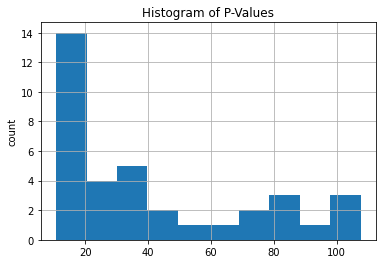

In [44]:
df_sas.P.hist()
plt.ylabel('count')
plt.title('Histogram of P-Values')
plt.show()

### Using read_stata to import Stata files

Let's now load a STATA file from Datacamp

In [45]:
! rm disarea.dta
! wget https://assets.datacamp.com/production/repositories/487/datasets/c4129edae533cf2683d8995f6dcdbcf5f41520ba/disarea.dta

rm: cannot remove 'disarea.dta': No such file or directory
--2020-06-01 15:32:40--  https://assets.datacamp.com/production/repositories/487/datasets/c4129edae533cf2683d8995f6dcdbcf5f41520ba/disarea.dta
Resolving assets.datacamp.com (assets.datacamp.com)... 13.227.47.111, 13.227.47.49, 13.227.47.27, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|13.227.47.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26316 (26K)
Saving to: ‘disarea.dta’

disarea.dta         100%[===================>]  25.70K  --.-KB/s    in 0.005s  

2020-06-01 15:32:40 (4.72 MB/s) - ‘disarea.dta’ saved [26316/26316]



In [46]:
# we use the pd.read_stata function directly on the file
df = pd.read_stata('disarea.dta')
df.head()

,wbcode,country,disa1,disa2,disa3,disa4,disa5,disa6,disa7,disa8,disa9,disa10,disa11,disa12,disa13,disa14,disa15,disa16,disa17,disa18,disa19,disa20,disa21,disa22,disa23,disa24,disa25
0,AFG,Afghanistan,0.00,0.00,0.76,0.73,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.06,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.02,0.00,0.00
1,AGO,Angola,0.32,0.02,0.56,0.00,0.0,0.00,0.56,0.0,0.00,0.13,0.0,0.0,0.00,0.0,0.06,0.0,0.4,0.0,0.61,0.00,0.0,0.99,0.98,0.61,0.00
2,ALB,Albania,0.00,0.00,0.02,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.99,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.16
3,ARE,United Arab Emirates,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00
4,ARG,Argentina,0.00,0.24,0.24,0.00,0.0,0.23,0.00,0.0,0.19,0.00,0.0,0.0,0.00,0.0,0.23,0.0,0.0,0.0,0.00,0.05,0.0,0.00,0.01,0.00,0.11


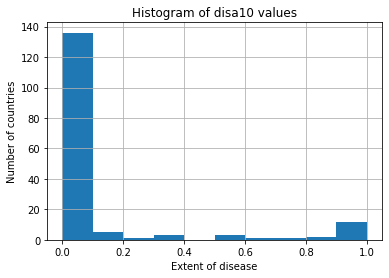

In [47]:
# Plot histogram of one column of the DataFrame
df.disa10.hist()
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.title('Histogram of disa10 values')
plt.show()

### Importing HDF5 files into pandas

According to the 2013 O'reilly book `Python and HDF5 by Andrew Collette`, in the Python world, concensus is rapidly converging on `Hierarchical Data Format Version 5` AKA `HDF5` as the standard mechanism for storing large quantities of numerical data. It;s now becoming common to deal with data sets hundreds of Gigabytes or Terabytes in size. `HDF5` itself can scale up to **Exabytes** of data.

<h4>What is the structure of HDF5 files?</h4>

We can explore its hierarchical structure just like Python dictionaries using the method keys(). 
```
for key in data.keys():
    print(key)
```
This would return the existing keys in the data set. Each of these is an HDF group. They are like directories. 
<br>Note that the HDF5 project is actively maintained by the HDF Group based in Champaign Illinois and formerly part of the university of Illinois, Urbana Champaign.

Let's load the LIGO HDF5 dta set. LIGO stands for `Laser Interferometer Gravitational-Wave Observatory Project`. 
<br>This project lead to the validation of Einsteins Theory of Gravitational waves.

In [48]:
! rm L-L1_LOSC_4_V1-1126259446-32.hdf5
! wget https://assets.datacamp.com/production/repositories/487/datasets/ab9107b749b832daada36bfaa718d9a591a0d69c/L-L1_LOSC_4_V1-1126259446-32.hdf5 

rm: cannot remove 'L-L1_LOSC_4_V1-1126259446-32.hdf5': No such file or directory
--2020-06-01 15:33:51--  https://assets.datacamp.com/production/repositories/487/datasets/ab9107b749b832daada36bfaa718d9a591a0d69c/L-L1_LOSC_4_V1-1126259446-32.hdf5
Resolving assets.datacamp.com (assets.datacamp.com)... 13.227.47.27, 13.227.47.49, 13.227.47.96, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|13.227.47.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 994831 (972K)
Saving to: ‘L-L1_LOSC_4_V1-1126259446-32.hdf5’

L-L1_LOSC_4_V1-1126 100%[===================>] 971.51K  --.-KB/s    in 0.1s    

2020-06-01 15:33:52 (9.79 MB/s) - ‘L-L1_LOSC_4_V1-1126259446-32.hdf5’ saved [994831/994831]



### Using h5py to import HDF5 files
The hdf5 file is already in your working directory. In this exercise, you'll import it using the h5py library. You'll also print out its datatype to confirm you have imported it correctly. You'll then study the structure of the file in order to see precisely what HDF groups it contains.

In [49]:
try:
    import h5py
    print('h5py imported')
except:
    ! pip install h5py
    import h5py

h5py imported


In [0]:
file_ = 'L-L1_LOSC_4_V1-1126259446-32.hdf5'

In [0]:
# Let's load the file as read only into the variable data
data = h5py.File(file_, 'r')

In [52]:
# Print the datatype of the loaded file
type(data)

h5py._hl.files.File

In [53]:
# Print the keys of the file
data.keys()

<KeysViewHDF5 ['meta', 'quality', 'strain']>

### Extracting data from your HDF5 file
In this exercise, you'll extract some of the LIGO experiment's actual data from the HDF5 file and you'll visualize it.

To do so, you'll need to first explore the HDF5 group 'strain'.

In [54]:
group_strain = data['strain']

for key in group_strain.keys():
    print(key)

Strain


In [56]:
strain = data['strain']['Strain'].value  # Let's convert the Strain data to a numpy array.
strain

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


array([-1.77955839e-18, -1.76552067e-18, -1.71049117e-18, ...,
       -1.76375155e-18, -1.72364846e-18, -1.71969299e-18])

In [57]:
type(strain)

numpy.ndarray

Let's see a data frame of the Strain values

In [58]:
df = pd.DataFrame(strain, columns=['value'])
df.head()

,value
0,-1.779558e-18
1,-1.765521e-18
2,-1.710491e-18
3,-1.667375e-18
4,-1.689567e-18


Plotting the data

In [0]:
# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

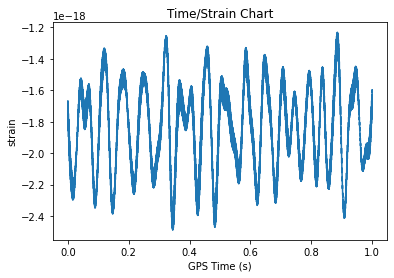

In [61]:
# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.title('Time/Strain Chart')
plt.show()

### Importing Matlab files

Matlab, short for Matrix Laboratory is a numerical computing environment that is an industry standard in the disciplines of engineering and science.

**SCIPY to the rescue!!**
We import .mat files from matlab into python using Scipy
```
scipy.io.loadmat()  # read .mat files
scipy.io.savemat()  # write .mat files
```
Another example
```
import scipy.io
file_name = 'workspace.mat'
mat = scipy.io.loadmat(filename)
print(type(mat))
<class 'dict'>

# How this dict object relates to a Matlab workspace is straight forward:- 
The keys of the python dict are the Matlab variable names and the values of the python dict are the objects that are assigned to the variables.
```

### Loading .mat files
In this exercise, you'll figure out how to load a MATLAB file using scipy.io.loadmat() and you'll discover what Python datatype it yields.

Download the 'albeck_gene_expression.mat' is in your working directory. This file contains gene expression data from the Albeck Lab at UC Davis. You can find the data and some great documentation here.

Let's download a .mat file from DataCamp home

In [62]:
! rm ja_data2.mat
! wget https://assets.datacamp.com/production/repositories/487/datasets/2fc0beea2d8cc7c93d79e79344a6e9e66f65d1fe/ja_data2.mat

rm: cannot remove 'ja_data2.mat': No such file or directory
--2020-06-01 15:36:52--  https://assets.datacamp.com/production/repositories/487/datasets/2fc0beea2d8cc7c93d79e79344a6e9e66f65d1fe/ja_data2.mat
Resolving assets.datacamp.com (assets.datacamp.com)... 13.227.47.96, 13.227.47.27, 13.227.47.49, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|13.227.47.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1310845 (1.2M)
Saving to: ‘ja_data2.mat’

ja_data2.mat        100%[===================>]   1.25M  --.-KB/s    in 0.1s    

2020-06-01 15:36:52 (11.8 MB/s) - ‘ja_data2.mat’ saved [1310845/1310845]



In [0]:
import scipy.io

In [0]:
# let's load the .mat file in
mat = scipy.io.loadmat('ja_data2.mat')

In [65]:
# Print the type of mat object
print(type(mat))

<class 'dict'>


### The structure of .mat in Python
Here, you'll discover what is in the MATLAB dictionary that you loaded in the previous exercise.

The file 'albeck_gene_expression.mat' is already loaded into the variable mat. The following libraries have already been imported as follows:

Once again, this file contains gene expression data from the Albeck Lab at UCDavis. You can find the data and some great documentation here.

In [66]:
# It's a dictionary so let's see the keys or variable names.

for key in mat.keys():
    print(key)

__header__
__version__
__globals__
rfpCyt
rfpNuc
cfpNuc
cfpCyt
yfpNuc
yfpCyt
CYratioCyt


In [67]:
# Let's see what type of object the CyratioCyt object is
print(type(mat['CYratioCyt']))

<class 'numpy.ndarray'>


In [68]:
# Since it's a Numpy array, lets see its shape and possibly read it in pandas
mat['CYratioCyt'].shape

(200, 137)

In [69]:
Cy_df = pd.DataFrame(mat['CYratioCyt'])
Cy_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136
0,0.0,1.530715,1.542970,1.543835,1.540612,1.539414,1.539082,1.546358,1.539163,1.538064,1.533514,1.535195,1.538650,1.533588,1.536760,1.534632,1.528644,1.528978,1.528967,1.521200,1.522763,1.529848,1.528085,1.532275,1.527329,1.526166,1.518129,1.523026,1.511491,1.507169,1.511268,1.504137,1.485858,1.252042,1.204481,1.342498,1.425758,1.465310,1.471561,1.488464,...,1.295696,1.306028,1.317568,1.315843,1.314783,1.315167,1.309955,1.308457,1.300091,1.296639,1.293874,1.297416,1.300500,1.310643,1.308980,1.306885,1.296918,1.293604,1.293860,1.284470,1.275110,1.271594,1.227985,1.102513,1.045241,1.047702,1.054769,1.066338,1.092667,1.132249,1.182672,1.227834,1.270177,1.302606,1.326556,1.344318,1.346707,1.349901,1.353300,1.349222
1,0.0,1.286056,1.293857,1.291514,1.301411,1.293554,1.294566,1.292169,1.294739,1.284011,1.291492,1.272801,1.277248,0.000000,0.000000,1.254792,1.273026,1.280400,1.272759,1.265431,1.262443,1.259495,1.262304,1.248887,1.246410,1.248446,1.239674,1.242063,1.244209,1.264539,1.270134,1.272589,1.236682,1.240196,1.240410,1.239358,1.247394,1.267230,1.264449,1.243326,...,1.282904,1.274848,1.278360,1.291723,1.285830,1.287132,1.285096,1.299681,1.291570,1.285322,1.286846,1.294430,1.292439,1.296801,1.294814,1.300684,1.301237,1.298162,1.291067,1.296663,1.303636,1.295251,1.283958,1.294177,1.305211,1.299002,1.292965,1.296468,1.298347,1.297784,1.297658,1.301694,1.315260,1.302534,1.299958,1.307488,1.301615,1.313073,1.300397,1.305639
2,0.0,1.327312,1.328846,1.335871,1.330013,1.330874,1.332512,1.324902,1.323474,1.316244,1.314658,1.263178,1.255742,1.254180,1.261845,1.279424,1.297059,1.292452,1.264719,1.237447,1.217798,1.217401,1.214400,1.226454,1.245748,1.258317,1.273642,1.241766,1.229410,1.225850,1.233364,1.227157,1.224394,1.222519,1.231648,1.249536,1.258538,1.252587,1.224598,1.215967,...,1.239364,1.237215,1.239283,1.242485,1.241035,1.252747,1.241792,1.248768,1.236400,1.236406,1.241759,1.246582,1.239272,1.246142,1.239899,1.248251,1.233257,1.237251,1.234774,1.239687,1.240533,1.233892,1.234107,1.231738,1.235609,1.231596,1.223083,1.231286,1.236963,1.233777,1.236642,1.233099,1.242091,1.239804,1.236164,1.242267,1.239264,1.248876,1.245062,1.258258
3,0.0,1.289753,1.310276,1.304953,1.301973,1.299540,1.296687,1.294289,1.285355,1.271334,1.250825,1.092466,1.074704,1.049950,1.068769,1.220948,1.302905,1.311002,1.246450,1.183147,1.044561,1.059834,1.060754,1.060654,1.125482,1.223406,1.273523,1.146819,1.059513,1.051933,1.041295,1.056479,1.062334,1.066950,1.097881,1.214639,1.267342,1.277193,1.084718,1.051737,...,0.953002,0.939424,0.944679,0.986941,0.998724,0.966442,0.941939,0.931763,0.969185,0.988218,0.969970,0.929999,0.935493,0.947520,0.960308,0.966401,0.940491,0.926372,0.930031,0.949692,0.951700,0.961522,0.926401,0.920598,0.930784,0.941701,0.965199,0.927106,0.917138,0.917168,0.950915,0.978052,0.980964,0.926710,0.927700,0.938188,0.977979,0.994292,0.966389,0.931045
4,0.0,1.403470,1.406892,1.410363,1.396433,1.397918,1.394087,1.388421,1.385351,1.373177,1.370967,1.312493,1.165230,1.094706,1.077751,1.092196,1.272698,1.389888,1.427614,1.240387,1.132880,1.139047,1.082376,1.118377,1.233729,1.305615,1.265499,1.188453,1.164155,1.085095,1.108729,1.230372,1.344869,1.268270,1.147487,1.069946,1.075708,1.092741,1.232061,1.340223,...,1.145667,1.139234,1.073853,1.077087,1.123339,1.134253,1.079605,1.067891,1.112085,1.125024,1.087397,1.074220,1.103883,1.116754,1.078456,1.076700,1.105191,1.100640,1.070529,1.078723,1.098109,1.095191,1.078545,1.080218,1.083076,1.094594,1.096252,1.089559,1.090279,1.094243,1.088814,1.091509,1.086506,1.094067,1.095045,1.101930,1.100378,1.094534,1.089303,1.086006


### Subset the array and plot it



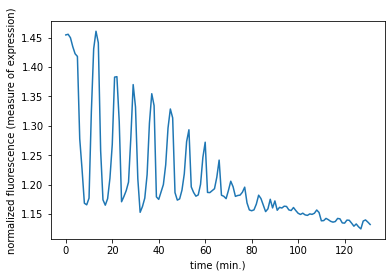

In [70]:
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()

# Chapter Three: Working with relational databases in Python

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### What is a relational database?

It's a type of data base that's based on the relational model of data, first described by `Ted Codd` in the late 1960s. A data base consists of tables. A table generally represents one entity type.
<br>A table does look like a data frame and that's the point. In a relational data base table, each row or record represents an instance of the entity type, each column represents an attribute of each instance. In this sense,  a table is entirely analogous to a Data Frame.
<br>It's essential that each row has a Unique identifier known as a primary key, to access the row in case. 
<br>Recall that a database consists of many tables, the really cool thing about a relational DB is not just the bunch of tables, but the fact that the tables are linked. The relational model has been widely adopted.
<br>`Codds' 12 Rules` also known as `Codds 12 commandments`which he developed in the early 1980s' describe what a relational DBMS should adhere to eb considered relational. His rules are actually 13, but it's zero indexed so first rule is index zero.
<br>Amongst the most popular RDBMS are `PostgreSQL`, `MySQL` and `SQLite`, all of which use the SQL query language.  

Creating a database engine
Here, you're going to fire up your very first SQL engine. You'll create an engine to connect to the SQLite database 'Chinook.sqlite', which is in your working directory. Remember that to create an engine to connect to 'Northwind.sqlite', Hugo executed the command

engine = create_engine('sqlite:///Northwind.sqlite')
Here, 'sqlite:///Northwind.sqlite' is called the connection string to the SQLite database Northwind.sqlite. A little bit of background on the Chinook database: the Chinook database contains information about a semi-fictional digital media store in which media data is real and customer, employee and sales data has been manually created.

The term 'Querying' is just a fancy way of saying, getting data out from te database.

In [72]:
! rm Chinook.sqlite
! wget https://assets.datacamp.com/production/repositories/487/datasets/ec8aa8bc9ffea6b4e2729e1a0a2d4aea2f300b3a/Chinook.sqlite

rm: cannot remove 'Chinook.sqlite': No such file or directory
--2020-06-01 15:38:20--  https://assets.datacamp.com/production/repositories/487/datasets/ec8aa8bc9ffea6b4e2729e1a0a2d4aea2f300b3a/Chinook.sqlite
Resolving assets.datacamp.com (assets.datacamp.com)... 13.227.47.49, 13.227.47.96, 13.227.47.27, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|13.227.47.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1091584 (1.0M)
Saving to: ‘Chinook.sqlite’

Chinook.sqlite      100%[===================>]   1.04M  --.-KB/s    in 0.1s    

2020-06-01 15:38:20 (10.2 MB/s) - ‘Chinook.sqlite’ saved [1091584/1091584]



In [0]:
# Import necessary module
from sqlalchemy import create_engine

In [0]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

What are the tables in the database?
save the table names to a list using the method table_names() on the engine and then you will print the list.

In [75]:
table_names = engine.table_names()
table_names

['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

Now to read data from the Chinnok Database we downloaded with wget, we need the following
1. To instantiate a create_engine_object() which we have done 
2. A connection object to the engine object
3. A connection execute object to pass the sql query to the connection object 
4. pandas to store the retrieved data as a data frame
5. Close the connection

See an example of the steps below:
```
from sqlalchemy import create engine

engine = create_engine('sqlite:///Chinook.sqlite')  
con = engine.connect()
rs = con.execute('select * from Album')
df = pd.DataFrame(rs.fetchall())
df.columns = rs.keys() # To set column names to the header in the table
con.close()
```

Let's do so in code

In [76]:
# Open engine connection: con
con = engine.connect()

# Perform query: rs
rs = con.execute("select * from Album")

# Save results of the query to DataFrame: df
album_df = pd.DataFrame(rs.fetchall())

# Close connection
con.close()

# Print head of DataFrame df
album_df.head()

,0,1,2
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


It looks okay, but the column names dont seem right. Let's set it to the headers in the table

In [77]:
# Open engine connection: con
con = engine.connect()

# Perform query: rs
rs = con.execute("select * from Album")

# Save results of the query to DataFrame: df
album_df = pd.DataFrame(rs.fetchall())

# set column names
album_df.columns = rs.keys()

# Close connection
con.close()

# Print head of DataFrame df
album_df.head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


Perfect!!

### Customizing the Hello World of SQL Queries
Congratulations on executing your first SQL query! Now you're going to figure out how to customize your query in order to:

Select specified columns from a table;<br>
Select a specified number of rows;<br>
Import column names from the database table.

The code looks like this
```
engine = create_engine('sqlite:///Northwind.sqlite')

with engine.connect() as con:
    rs = con.execute("SELECT OrderID, OrderDate, ShipName FROM Orders")
    df = pd.DataFrame(rs.fetchmany(size=5))  # we use fetchmany to select num of rows
    df.columns = rs.keys()
```


Let's see the Employee table column names so we can select a few of them

In [78]:
# Establish a connection to the sqlite engine
con = engine.connect()

# Execute an sql query ad save the result in rs
rs = con.execute('Select * from Employee')

# Print the keys
print(rs.keys())

['EmployeeId', 'LastName', 'FirstName', 'Title', 'ReportsTo', 'BirthDate', 'HireDate', 'Address', 'City', 'State', 'Country', 'PostalCode', 'Phone', 'Fax', 'Email']


Now Execute the SQL query that selects the columns FirstName, LastName and Title from the Employee table. Store the results in the variable rs.

In [79]:
with engine.connect() as con:
    rs = con.execute("select FirstName, LastName, Title from Employee")
    employee_df = pd.DataFrame(rs.fetchmany(5), columns=rs.keys()) # we fetch only 5 rows with their headers
employee_df

,FirstName,LastName,Title
0,Andrew,Adams,General Manager
1,Nancy,Edwards,Sales Manager
2,Jane,Peacock,Sales Support Agent
3,Margaret,Park,Sales Support Agent
4,Steve,Johnson,Sales Support Agent


In [80]:
len(employee_df)

5

Now let's read in the entire Employee table

In [81]:
with engine.connect() as con:
    rs = con.execute("select * from Employee")
    employee_df = pd.DataFrame(rs.fetchall(), columns=rs.keys()) # we fetch all rows
employee_df

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [82]:
# let's see the shape
employee_df.shape

(8, 15)

### Filtering your database records using SQL's WHERE
You can now execute a basic SQL query to select records from any table in your database and you can also perform simple query customizations to select particular columns and numbers of rows.

There are a couple more standard SQL query chops that will aid you in your journey to becoming an SQL ninja.

Let's say, for example that you wanted to get all records from the Customer table of the Chinook database for which the Country is 'Canada'. You can do this very easily in SQL using a SELECT statement followed by a WHERE clause as follows:
```
SELECT * FROM Customer WHERE Country = 'Canada'
```
In fact, you can filter any SELECT statement by any condition using a WHERE clause. This is called filtering your records.

Execute the query that selects all records from the Employee table where 'EmployeeId' is greater than or equal to 6. Use the >= operator and assign the results to rs.
Apply the method fetchall() to rs in order to fetch all records in rs. Store them in the DataFrame df.
Using the rs object, set the DataFrame's column names to the corresponding names of the table columns.

In [83]:
# As usual lets establish a connection to the engine
with engine.connect() as con:
    rs = con.execute('select * from Employee where EmployeeId >= 6')  # select all records where EmployeeID >= 6
    df = pd.DataFrame(rs.fetchall(), columns=rs.keys())
df

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,6,Mitchell,Michael,IT Manager,1,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
1,7,King,Robert,IT Staff,6,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
2,8,Callahan,Laura,IT Staff,6,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


### Ordering your SQL records with ORDER BY
You can also order your SQL query results. For example, if you wanted to get all records from the Customer table of the Chinook database and order them in increasing order by the column SupportRepId, you could do so with the following query:

`"SELECT * FROM Customer ORDER BY SupportRepId"`
In fact, you can order any SELECT statement by any column.

In this interactive exercise, you'll select all records of the Employee table and order them in increasing order by the column BirthDate.

In [84]:
# Let's establish a connection to the data base
with engine.connect() as con:
    rs = con.execute('select * from Employee order by BirthDate asc')
    df = pd.DataFrame(rs.fetchall(), columns=rs.keys())
df

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
3,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
4,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com
5,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
6,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
7,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com


### Querying relational databases directly with pandas

with just 4 lines of code we can read data from a relational database straight to pandas. that's cool. But imagine reading it in one line!!

Introducing pandas: `pd.read_sql_query()` function. It takes 2 arguments. The first will be the quey string and the second the database connection engine object `engine` that we want to connect to.

<h4>Pandas and The Hello World of SQL Queries!</h4>
Here, you'll take advantage of the power of pandas to write the results of your SQL query to a DataFrame in one swift line of Python code!

In [85]:
# let's re-create the connection to the database engine
engine = create_engine('sqlite:///Chinook.sqlite')

# let's connect to the engine using pandas to read in the Customer table staright to a data frame
customer_df = pd.read_sql_query('select * from Customer', engine)
customer_df.head()

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


In [86]:
customer_df.shape

(59, 13)

Notice that pandas reads it in fully with column names in place.

<h4>Pandas for more complex querying</h4>
Here, you'll become more familiar with the pandas function read_sql_query() by using it to execute a more complex query: a SELECT statement followed by both a WHERE clause AND an ORDER BY clause.

You'll build a DataFrame that contains the rows of the Customer table for which the CustomerId is greater than or equal to 35 and you'll order these entries by Country descending alphabetically.

In [87]:
df = pd.read_sql_query('select * from Customer where CustomerId >= 35 order by Country desc', engine)
# the above code selects customer data for customers with Ids >= 35 and orders by Country names alphabetically from Z to A.
df.head()

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,52,Emma,Jones,None,202 Hoxton Street,London,None,United Kingdom,N1 5LH,+44 020 7707 0707,None,emma_jones@hotmail.com,3
1,53,Phil,Hughes,None,113 Lupus St,London,None,United Kingdom,SW1V 3EN,+44 020 7976 5722,None,phil.hughes@gmail.com,3
2,54,Steve,Murray,None,110 Raeburn Pl,Edinburgh,None,United Kingdom,EH4 1HH,+44 0131 315 3300,None,steve.murray@yahoo.uk,5
3,51,Joakim,Johansson,None,Celsiusg. 9,Stockholm,None,Sweden,11230,+46 08-651 52 52,None,joakim.johansson@yahoo.se,5
4,50,Enrique,Muñoz,None,C/ San Bernardo 85,Madrid,None,Spain,28015,+34 914 454 454,None,enrique_munoz@yahoo.es,5


Let's read all the tables into individual data frames using pd.read_sql_query()

In [0]:
for table in table_names:
    query = 'select * from ' + table
    df = pd.read_sql_query(query, engine)
    df.to_csv(table+'.csv',encoding='utf-8')

In [89]:
# let's check for the files
! ls

Album.csv	Invoice.csv			   Playlist.csv
Artist.csv	InvoiceLine.csv			   PlaylistTrack.csv
Chinook.sqlite	ja_data2.mat			   sales.sas7bdat
Customer.csv	L-L1_LOSC_4_V1-1126259446-32.hdf5  sample_data
disarea.dta	MediaType.csv			   titanic.csv
Employee.csv	mnist_kaggle_some_rows.csv	   Track.csv
Genre.csv	moby_dick.txt


So yay!! we can see all our tables saved away as CSV files that we can load in pandas. Let's load the Genre.csv file

In [90]:
genre_df = pd.read_csv('Genre.csv')
genre_df.head()

,Unnamed: 0,GenreId,Name
0,0,1,Rock
1,1,2,Jazz
2,2,3,Metal
3,3,4,Alternative & Punk
4,4,5,Rock And Roll


We seem to be getting double index. let's do it again but set index to false

In [0]:
for table in table_names:
    query = 'select * from ' + table
    df = pd.read_sql_query(query, engine)
    df.to_csv(table+'.csv',encoding='utf-8', index=False)

In [92]:
# let's see the genre table again
genre_df = pd.read_csv('Genre.csv')
genre_df.head()

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


Much better!! let's also check the Invoice table

In [93]:
invoice_df = pd.read_csv('Invoice.csv')
invoice_df.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2007-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,NaN,Germany,70174,1.98
1,2,4,2007-01-02 00:00:00,Ullevålsveien 14,Oslo,NaN,Norway,0171,3.96
2,3,8,2007-01-03 00:00:00,Grétrystraat 63,Brussels,NaN,Belgium,1000,5.94
3,4,14,2007-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2007-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86


### Advanced querying: exploiting table relationships


The power of SQL lies in relationships between tables: INNER JOIN
Here, you'll perform your first INNER JOIN! You'll be working with your favourite SQLite database, Chinook.sqlite. For each record in the Album table, you'll extract the Title along with the Name of the Artist. The latter will come from the Artist table and so you will need to INNER JOIN these two tables on the ArtistID column of both.

Recall that to INNER JOIN the Orders and Customers tables from the Northwind database, Hugo executed the following SQL query:

`"SELECT OrderID, CompanyName FROM Orders INNER JOIN Customers on Orders.CustomerID = Customers.CustomerID"`


Assign to rs the results from the following query: select all the records, extracting the Title of the record and Name of the artist of each record from the Album table and the Artist table, respectively. To do so, INNER JOIN these two tables on the ArtistID column of both.
In a call to pd.DataFrame(), apply the method fetchall() to rs in order to fetch all records in rs. Store them in the DataFrame df.
Set the DataFrame's column names to the corresponding names of the table columns.

In [94]:
# let's see the two tables briefly
print(album_df.head())
print()
artist_df = pd.read_csv('Artist.csv')
print(artist_df.head())

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3

   ArtistId               Name
0         1              AC/DC
1         2             Accept
2         3          Aerosmith
3         4  Alanis Morissette
4         5    Alice In Chains


In [95]:
engine

Engine(sqlite:///Chinook.sqlite)

First let's use the connection syntax

In [96]:
# Lets set the connection
with engine.connect() as con:
    rs = con.execute('select Album.Title, Artist.Name from Album inner join Artist on Album.ArtistId = Artist.ArtistId')
    df = pd.DataFrame(rs.fetchall(), columns=rs.keys())
df.head()

,Title,Name
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept
2,Restless and Wild,Accept
3,Let There Be Rock,AC/DC
4,Big Ones,Aerosmith


Next let's use pandas read-sql-query

In [97]:
# Lets set the connection

query = 'select Album.Title, Artist.Name from Album inner join Artist on Album.ArtistId = Artist.ArtistId'
df = pd.read_sql_query(query, engine)
df.head()

,Title,Name
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept
2,Restless and Wild,Accept
3,Let There Be Rock,AC/DC
4,Big Ones,Aerosmith


### Filtering your INNER JOIN
Congrats on performing your first INNER JOIN! You're now going to finish this chapter with one final exercise in which you perform an INNER JOIN and filter the result using a WHERE clause.

Recall that to INNER JOIN the Orders and Customers tables from the Northwind database, Hugo executed the following SQL query:
```
"SELECT OrderID, CompanyName FROM Orders INNER JOIN Customers on Orders.CustomerID = Customers.CustomerID"
``` 
Use the pandas function read_sql_query() to assign to the variable df the DataFrame of results from the following query: select all records from PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackId that satisfy the condition Milliseconds < 250000

In [98]:
playlist_track_df = pd.read_csv('PlaylistTrack.csv')
print(playlist_track_df.head())
print()
track_df = pd.read_csv('Track.csv')
print(track_df.head())

   PlaylistId  TrackId
0           1     3402
1           1     3389
2           1     3390
3           1     3391
4           1     3392

   TrackId                                     Name  ...     Bytes  UnitPrice
0        1  For Those About To Rock (We Salute You)  ...  11170334       0.99
1        2                        Balls to the Wall  ...   5510424       0.99
2        3                          Fast As a Shark  ...   3990994       0.99
3        4                        Restless and Wild  ...   4331779       0.99
4        5                     Princess of the Dawn  ...   6290521       0.99

[5 rows x 9 columns]


In [99]:
track_df.Milliseconds.head()

0    343719
1    342562
2    230619
3    252051
4    375418
Name: Milliseconds, dtype: int64

In [100]:
query = 'select * from PlaylistTrack inner join Track on PlaylistTrack.TrackId = Track.TrackId where Milliseconds < 250000'
df = pd.read_sql_query(query, engine)
df.head()

,PlaylistId,TrackId,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,3390,3390,One and the Same,271,2,23,None,217732,3559040,0.99
1,1,3392,3392,Until We Fall,271,2,23,None,230758,3766605,0.99
2,1,3393,3393,Original Fire,271,2,23,None,218916,3577821,0.99
3,1,3394,3394,Broken City,271,2,23,None,228366,3728955,0.99
4,1,3395,3395,Somedays,271,2,23,None,213831,3497176,0.99


Do project,

PROJECT: TV, HALFTIME SHOWS, AND THE BIG GAME